<a href="https://www.kaggle.com/code/iwways/calculating-premiums-like-a-pro-or-not-eda?scriptVersionId=214410079" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

Hi!
This is new playground competition and in this month we're having an insurance dataset. 

Before diving deeper into code, let's describe a little topic in which we will work.

For start, a little meme which describes all this thing :)

![](https://leadsurance.com/wp-content/uploads/2020/08/insurance-meme-6.jpg)


# Problem definition

## What is insurance?

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">Insurance is a means of protection from financial loss in which, in exchange for a fee, a party agrees to compensate another party in the event of a certain loss, damage, or injury. It is a form of risk management, primarily used to protect against the risk of a contingent or uncertain loss. <br><br>
    An entity which provides insurance is known as an insurer, insurance company, insurance carrier, or underwriter. A person or entity who buys insurance is known as a policyholder, while a person or entity covered under the policy is called an insured.

</p>
</div>

## How insurance Works<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
When you buy a policy you make regular payments, known as premiums, to the insurer. If you make a claim your insurer will pay out for the loss that is covered under the policy. <br><br>
If you don’t make a claim, you won’t get your money back; instead it is pooled with the premiums of other policyholders who have taken out insurance with the same insurance company. If you make a claim the money comes from the pool of policyholders’ premiums.
</p>
</div>


## Insurance Policy Components


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<ul>
  <li>
    <b>Insurance Premiums</b><br>
    An insurance policy's premium is the amount you must pay to obtain a specified quantity of insurance coverage. It's usually described as a recurring fee that you pay as a lumpsum, or on a monthly, quarterly, half-yearly, or annual basis during the premium payment period.<br><br>
    An insurance firm determines the premium of an insurance plan depending on a number of criteria. The goal is to determine if an insured person is eligible for the type of insurance plan he or she wants to purchase.<br><br>
    For example, suppose you are fit and have no medical history of receiving treatment for serious physical disorders. In that case, you will likely be paying less for medical insurance or life insurance than those who have many ailments.<br><br>
    You should also be aware that for comparable products, various insurance providers may charge varying prices. As a result, finding the correct one at a reasonable price takes some time and effort.
  </li>

  <li>
    <b>Policy Restrictions</b><br>
    It is defined as the maximum amount for which an insurance company is responsible for losses covered by the policy. It is calculated depending on the insurance term, loss or damage, and other comparable criteria.<br><br>
    Typically, the greater the policy limit, the greater the premium. The sum assured is the maximum amount that an insurer will pay to the nominee under a life insurance policy.
  </li>

  <li>
    <b>Deductible</b><br>
    The amount or percentage that the insured decides to pay out of pocket before the insurer steps in to settle a claim is referred to as the deductible. The insurance company is liable to pay the claim amount only when it exceeds the deductible.<br><br>
    Deductibles are determined by the provisions of a certain type of policy and are applicable per policy or per claim. In general, insurance policies with large deductibles are less expensive since fewer claims are filed due to the greater out-of-pocket price.
  </li>
</ul>

</div>


# Import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
import pandas as pd
import missingno as mnso
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import boxcox
from scipy.special import boxcox1p


# Load data

After exploring discussions it seems reasonable to log transform our target variable to ensure that we optimizing directly the evaluation metric for this competition

In [2]:
X_train = pd.read_csv('/kaggle/input/playground-series-s4e12/train.csv')
X_test = pd.read_csv('/kaggle/input/playground-series-s4e12/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e12/sample_submission.csv')

X_train = X_train.drop(['id'], axis=1)
id_test = X_test.id
X_test = X_test.drop('id', axis=1)
# y = X_train['Premium Amount']
# y_log = np.log1p(y)

pd.set_option('display.max_columns', None)

In [3]:
X_train.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

# EDA

In [4]:
X_train

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,Premium,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,Comprehensive,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,Basic,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,Premium,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-

In [6]:
X_train['Number of Dependents'] = X_train['Number of Dependents'].astype('Int64')
X_train['Vehicle Age'] = X_train['Vehicle Age'].astype('Int64')
X_train['Insurance Duration'] = X_train['Insurance Duration'].astype('Int64')
X_train['Previous Claims'] = X_train['Previous Claims'].astype('Int64')

This features I decided to treat as discrete (maybe categorical), because they have fixed range of values

## Defining missing values

<Axes: >

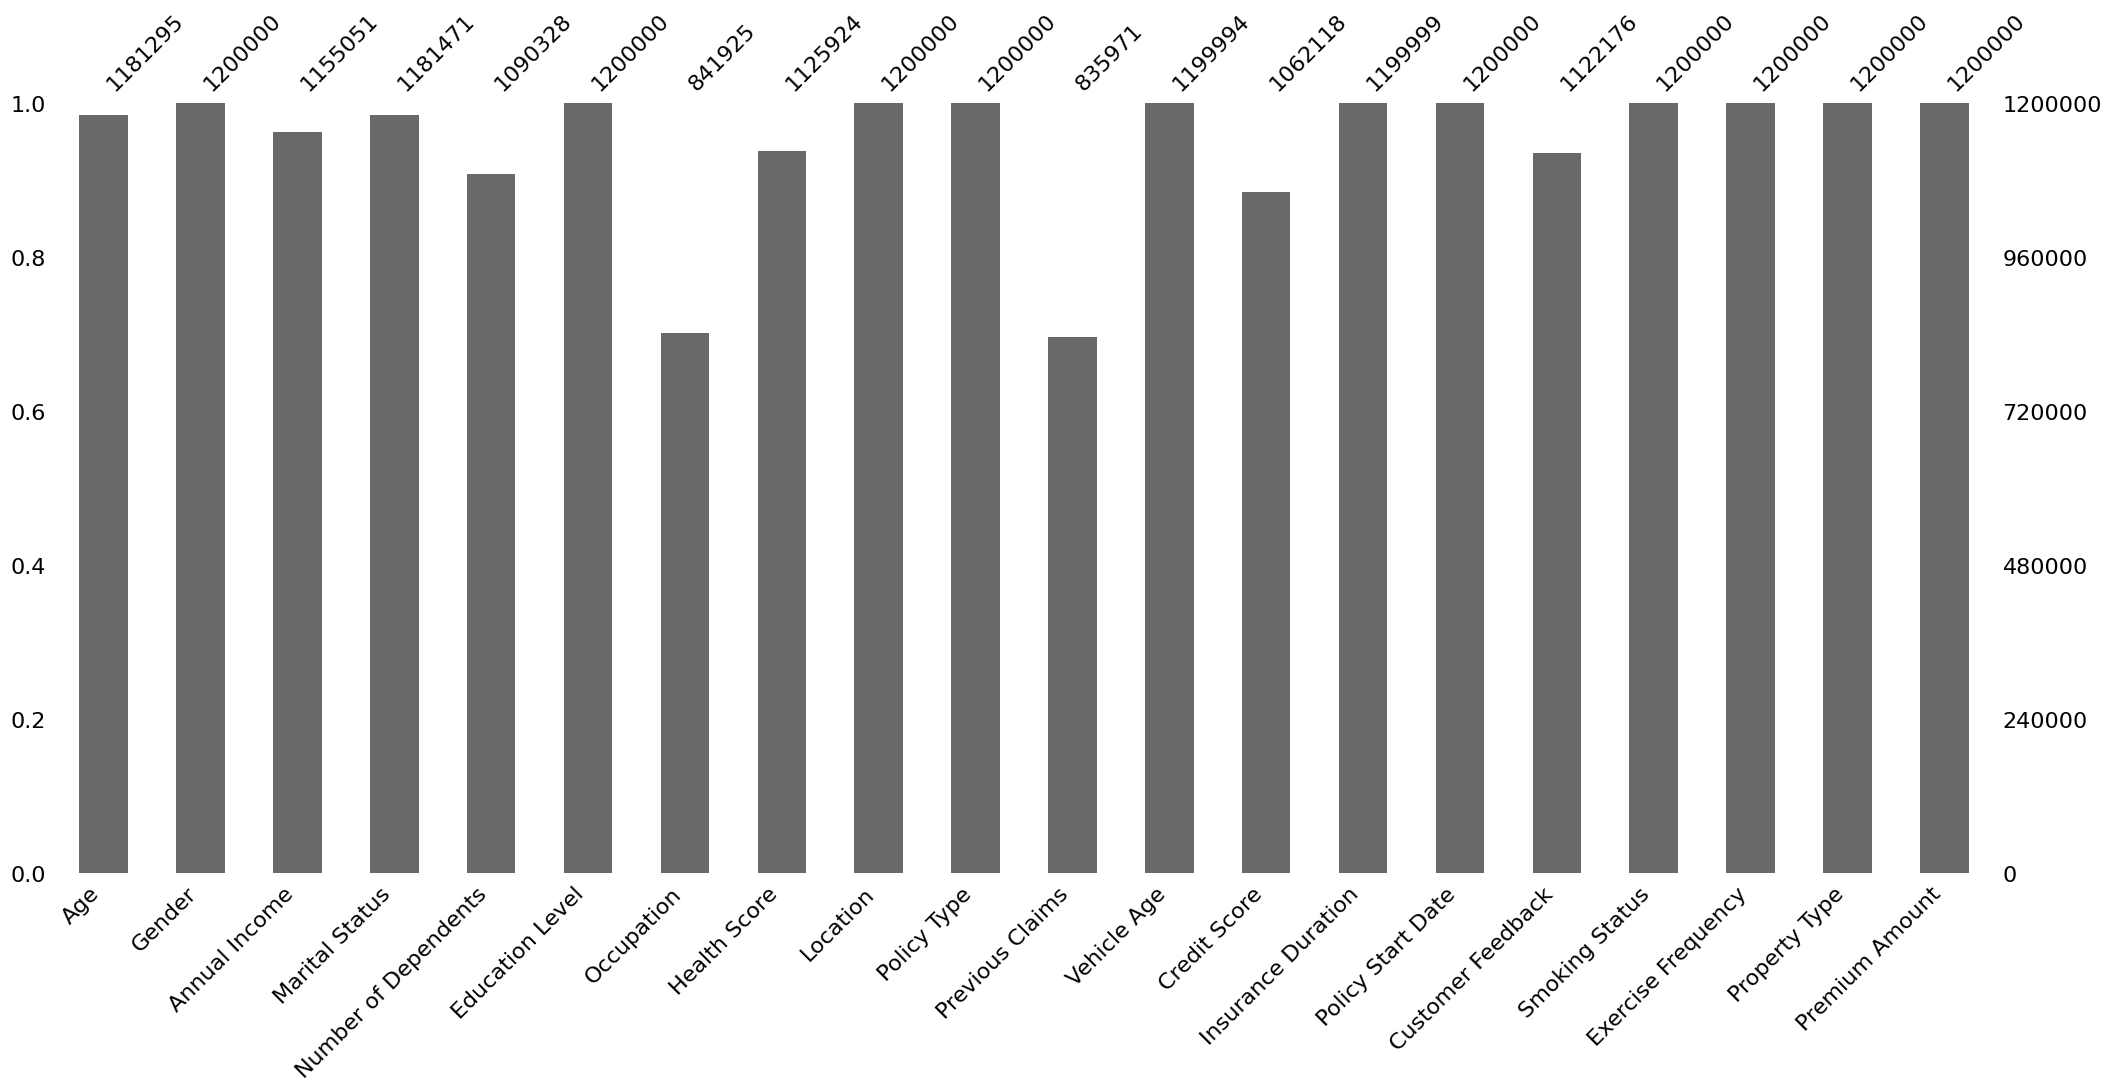

In [7]:
mnso.bar(X_train)

It seems that we're having a smaller number of missing values than in previous competition.

## Defining feature's types

In [8]:
numerical_features_total = X_train.select_dtypes(exclude='object').columns
numerical_features_continuos = X_train.select_dtypes(exclude=['object', 'int']).columns
numerical_features_discrete = X_train.select_dtypes(exclude=['object', 'float']).columns
categorical_features = X_train.select_dtypes(include='object').columns

## Heatmap for numerical features

<Axes: >

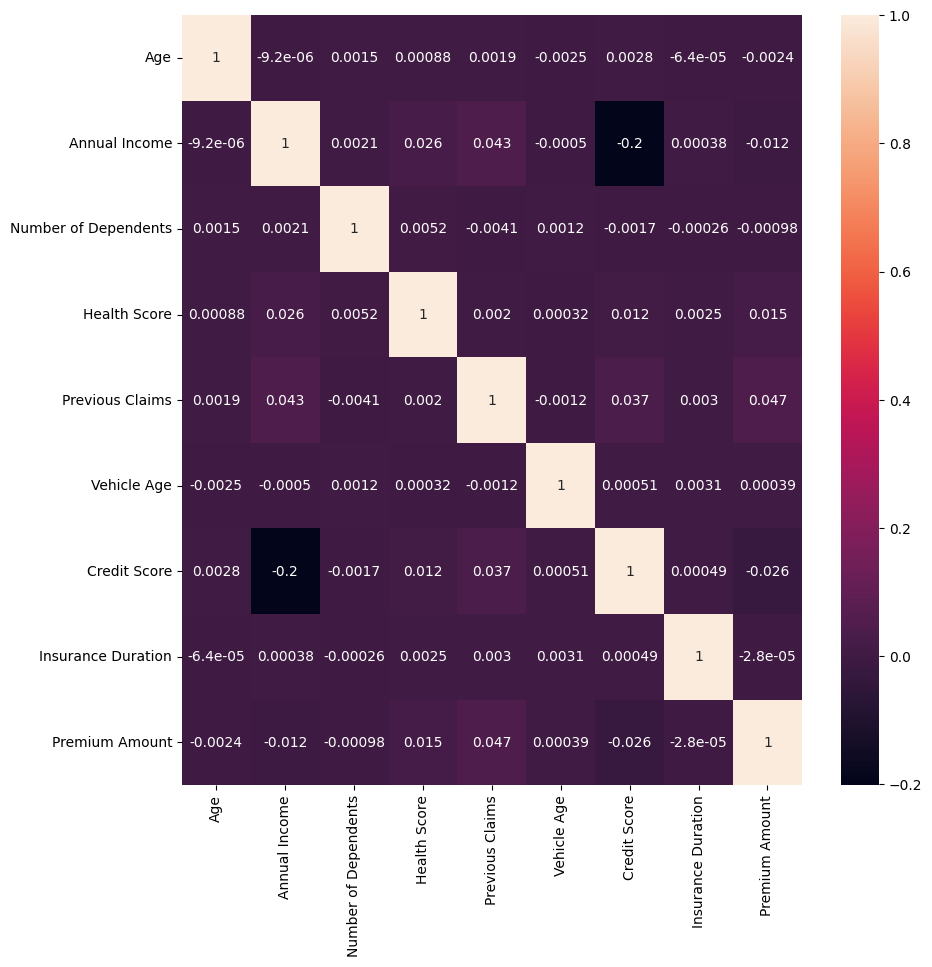

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(X_train[numerical_features_total].corr(), annot=True)

It seems that our features doesnt have a direct correlation with target variable (Premium Amount). In fact there's no strong correlation between every pair of features. Maybe situation will change after some feature engineering later.

## Numerical features summary

In [10]:
X_train[numerical_features_total].describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.181295e+06,1.155051e+06,1090328.0,1.125924e+06,835971.0,1199994.0,1.062118e+06,1199999.0,1.200000e+06
mean,4.114556e+01,3.274522e+04,2.009934,2.561391e+01,1.002689,9.569889,5.929244e+02,5.018219,1.102545e+03
std,1.353995e+01,3.217951e+04,1.417338,1.220346e+01,0.98284,5.776189,1.499819e+02,2.594331,8.649989e+02
min,1.800000e+01,1.000000e+00,0.0,2.012237e+00,0.0,0.0,3.000000e+02,1.0,2.000000e+01
25%,3.000000e+01,8.001000e+03,1.0,1.591896e+01,0.0,5.0,4.680000e+02,3.0,5.140000e+02
50%,4.100000e+01,2.391100e+04,2.0,2.457865e+01,1.0,10.0,5.950000e+02,5.0,8.720000e+02
75%,5.300000e+01,4.463400e+04,3.0,3.452721e+01,2.0,15.0,7.210000e+02,7.0,1.509000e+03
max,6.400000e+01,1.499970e+05,4.0,5.897591e+01,9.0,19.0,8.490000e+02,9.0,4.999000e+03


## Vizualization of continuos features

In [11]:
numerical_features_continuos

Index(['Age', 'Annual Income', 'Health Score', 'Credit Score',
       'Premium Amount'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

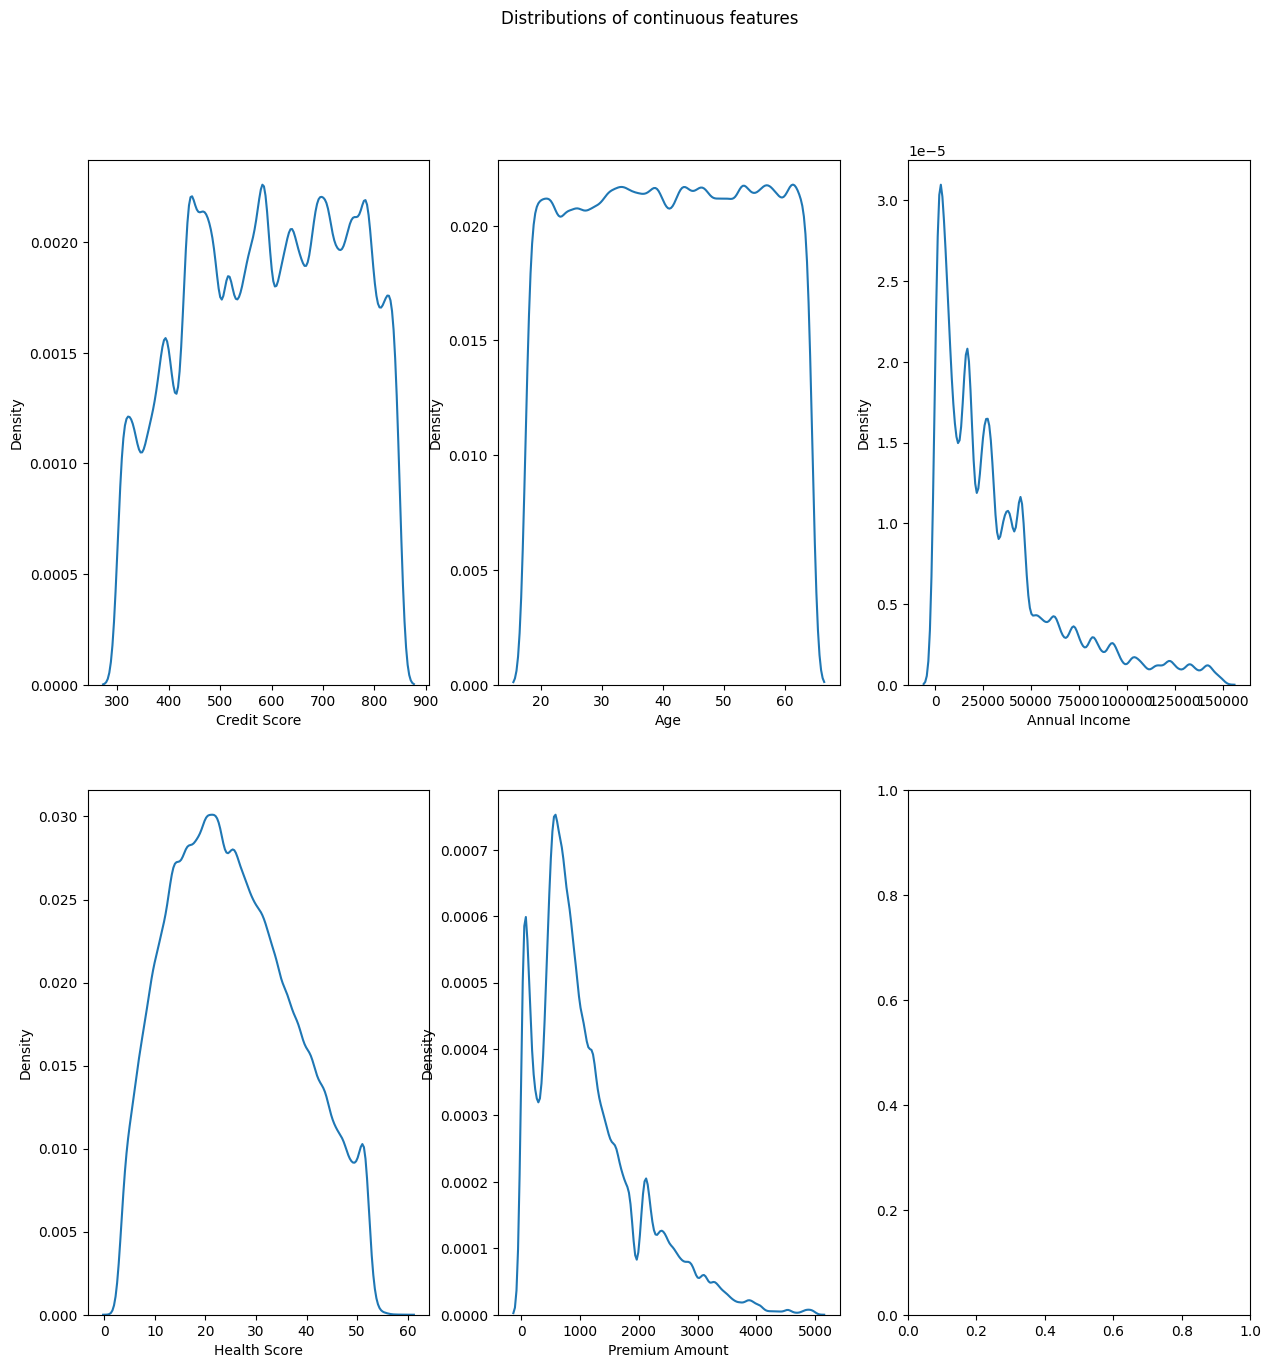

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(15,15))
fig.suptitle('Distributions of continuous features')


sns.kdeplot(ax=axes[0,0], data=X_train, x='Credit Score')
axes[0,0] = 'Credit Score Distribution'
sns.kdeplot(ax=axes[0,1], data=X_train, x='Age')
axes[0,1] = 'Age Distribution'
sns.kdeplot(ax=axes[0,2], data=X_train, x='Annual Income')
axes[0,2] = 'Annual Income Distribution'
sns.kdeplot(ax=axes[1,0], data=X_train, x='Health Score')
axes[1,0] = 'Health Score Distribution'
sns.kdeplot(ax=axes[1,1], data=X_train, x='Premium Amount')
axes[1,1] = 'Premium Amount Distribution'

## Vizualization of discrete features

In [13]:
numerical_features_discrete

Index(['Number of Dependents', 'Previous Claims', 'Vehicle Age',
       'Insurance Duration'],
      dtype='object')

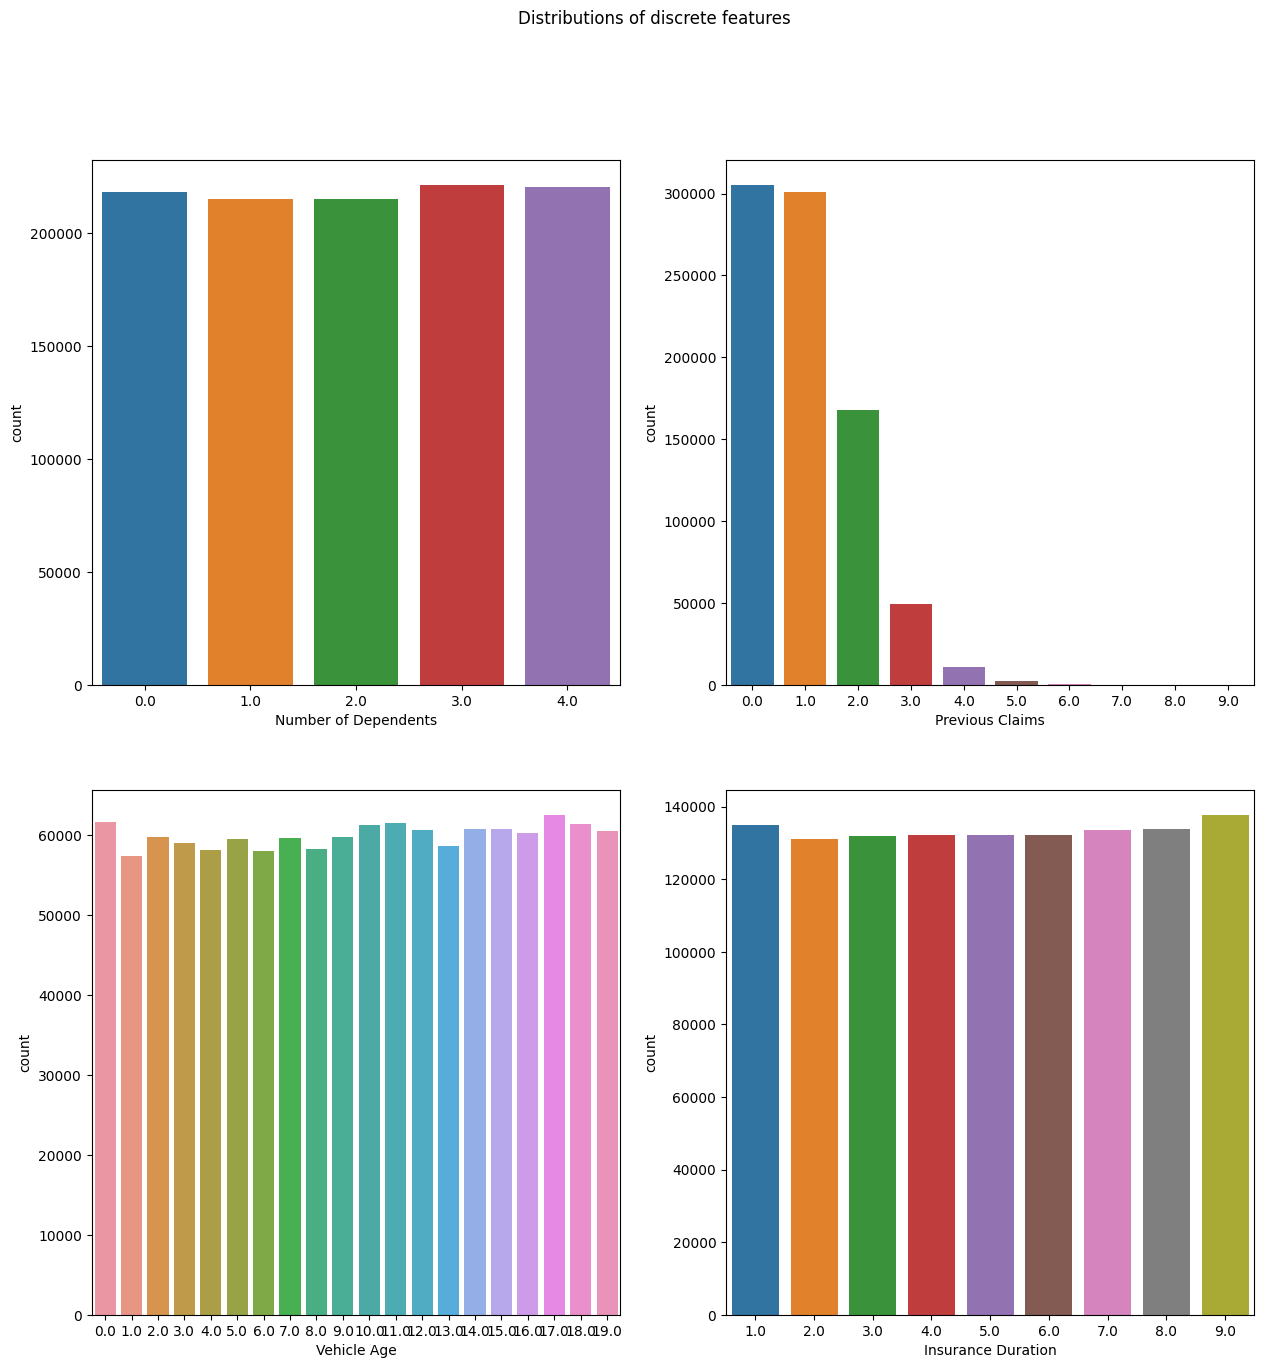

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Distributions of discrete features')


sns.countplot(ax=axes[0,0], data=X_train, x='Number of Dependents')
axes[0,0] = 'Number of Dependents Distribution'
sns.countplot(ax=axes[0,1], data=X_train, x='Previous Claims')
axes[0,1] = 'Previous Claims Distribution'
sns.countplot(ax=axes[1,0], data=X_train, x='Vehicle Age')
axes[1,0] = 'Vehicle Age Distribution'
sns.countplot(ax=axes[1,1], data=X_train, x='Insurance Duration')
axes[1,1] = 'Insurance Duration Distribution'

## Vizualization of categorical features

In [15]:
categorical_features

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Policy Start Date', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')

In [16]:
new_array = np.delete(categorical_features, np.where(categorical_features == 'Policy Start Date'))

In [17]:
new_array

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')

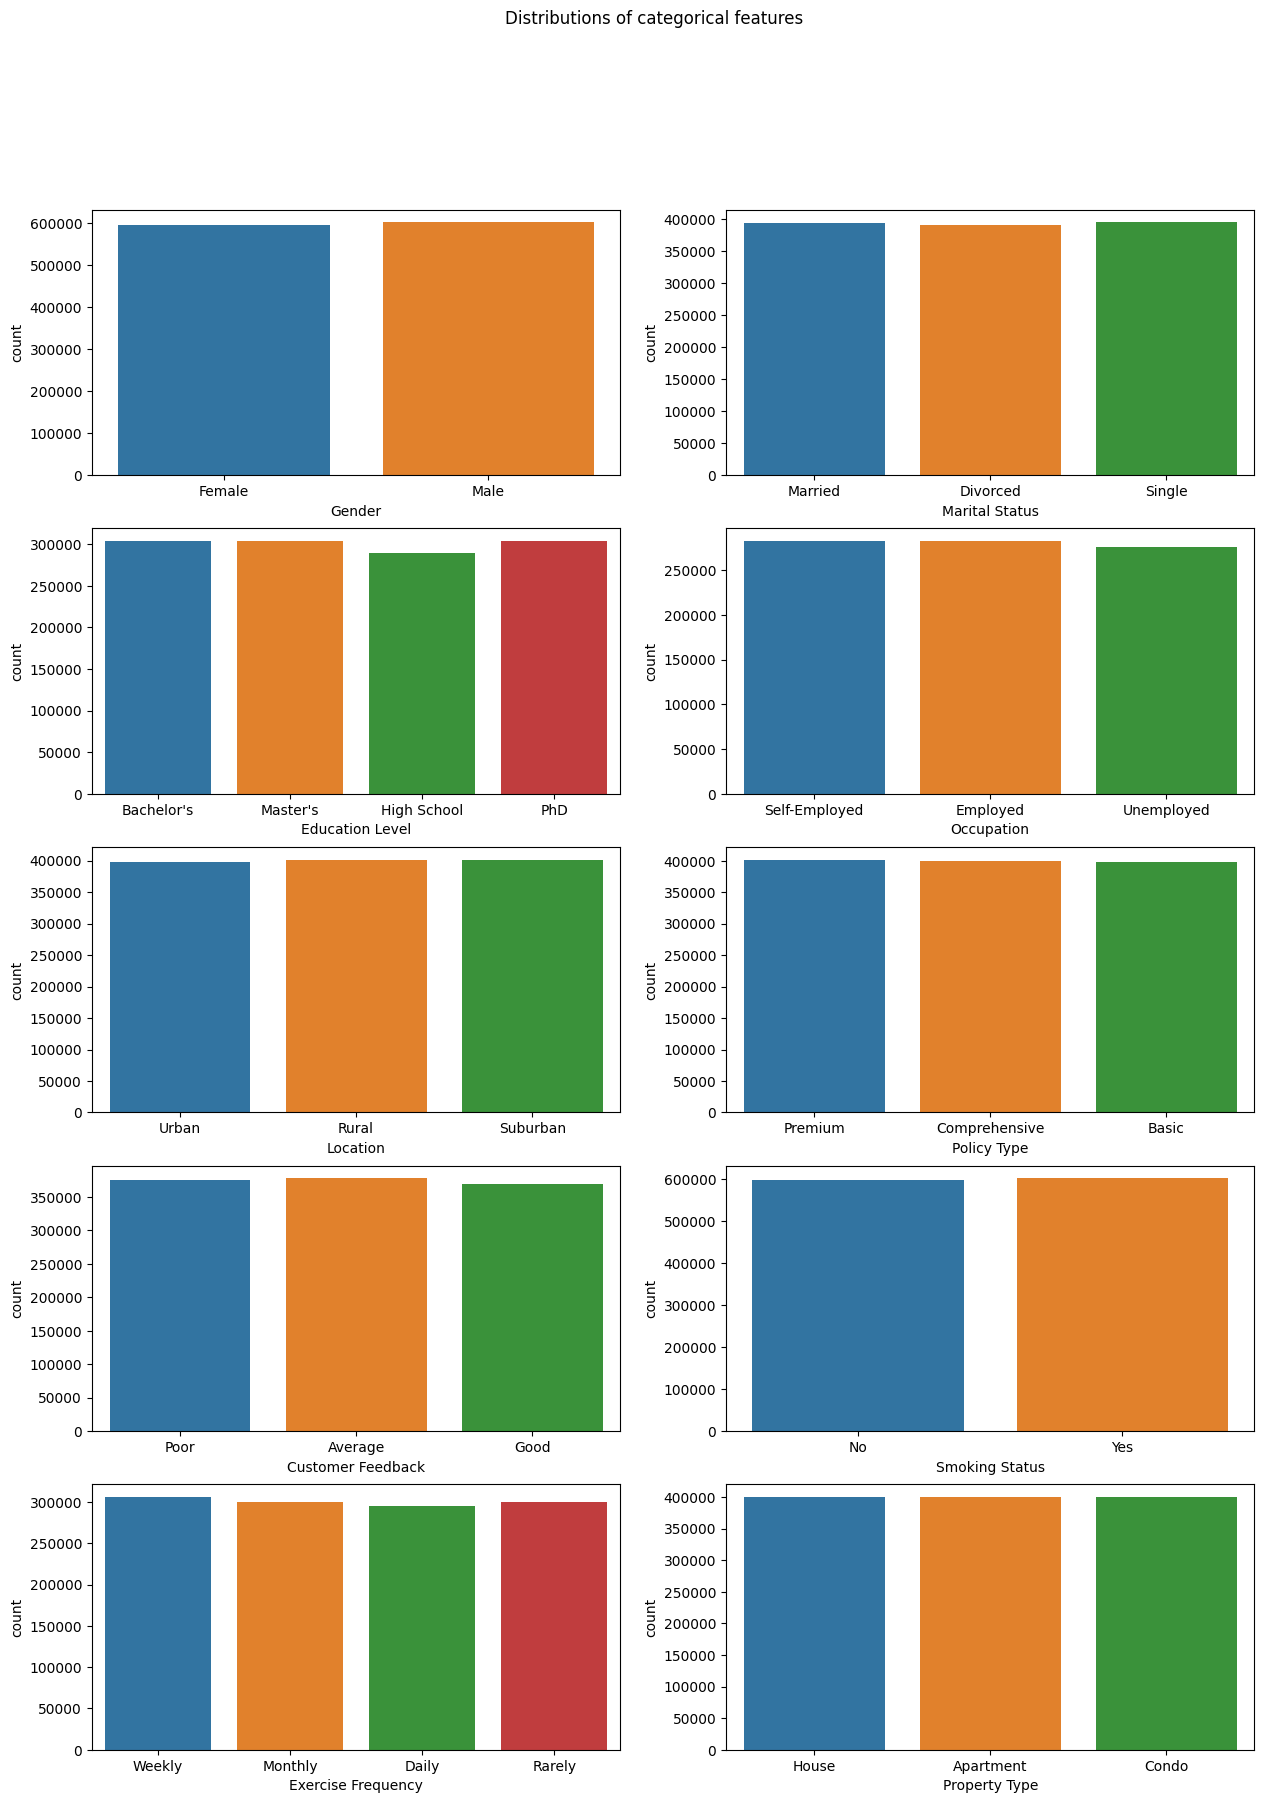

In [18]:
def plot_categorical_features(data, features):
    fig, axes = plt.subplots(5, 2, figsize=(15,20))
    fig.suptitle('Distributions of categorical features')
    feat = 0
    for a in axes.flat:
        sns.countplot(ax=a, data=data, x=features[feat])
        a = features[feat]
        feat +=1 

    plt.show()
plot_categorical_features(X_train, new_array)

Plot value counts for each feature

In [19]:
for cat in categorical_features:
    print(X_train[cat].value_counts())
    print()

Gender
Male      602571
Female    597429
Name: count, dtype: int64

Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64

Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64

Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64

Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64

Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64

Policy Start Date
2020-02-08 15:21:39.134960    142
2022-02-02 15:21:39.134960    137
2023-08-13 15:21:39.155231    137
2022-08-30 15:21:39.134960    134
2024-02-19 15:21:39.134960    118
                             ... 
2022-09-24 15:21:39.199447      1
2020-09-17 15:21:39.258696      1
2021-08-20 15:21:39.286113      1
2022-12-30 15:21:39.257696      1
2024-07-22 15:21:39.217387    

As we can see categorical features approximately have the almost the same number of categories, except Policy Start Date. I've decided not to plot it, because it would take a lo-o-ot of time.

From value counts we can assume types of encoding for our categorical features.
Binary encoding:
* Gender
* Smoking Status

Ordinal encoding:
* Education Level
* Policy Type
* Exercise frequency
* Customer Feedback

All other features we can encode by one-hot encoding

## Vizualization of features vs target

I've did this to see have features depend on target, so I can see which type of relationship is here

In [20]:
numerical_features_total

Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')

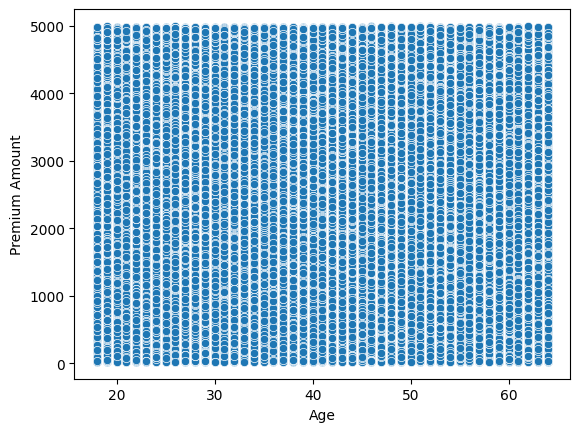

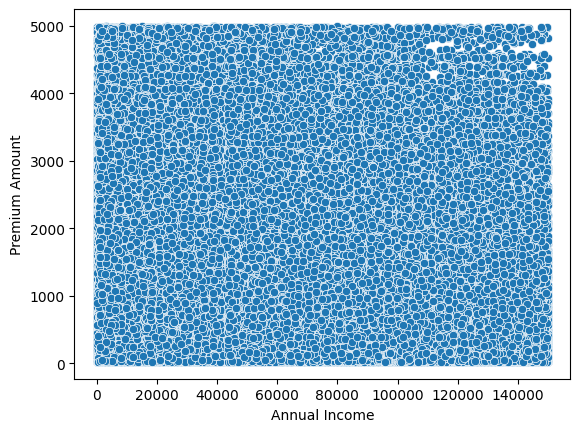

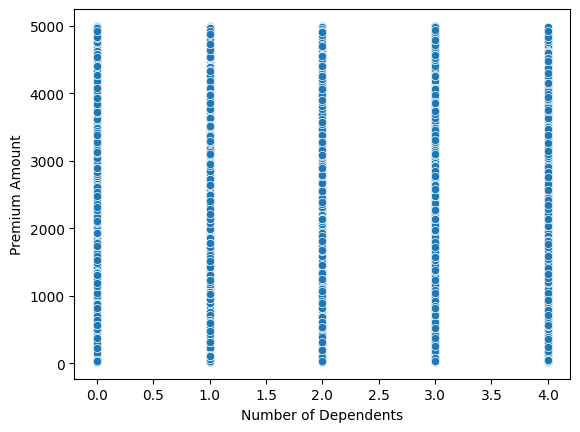

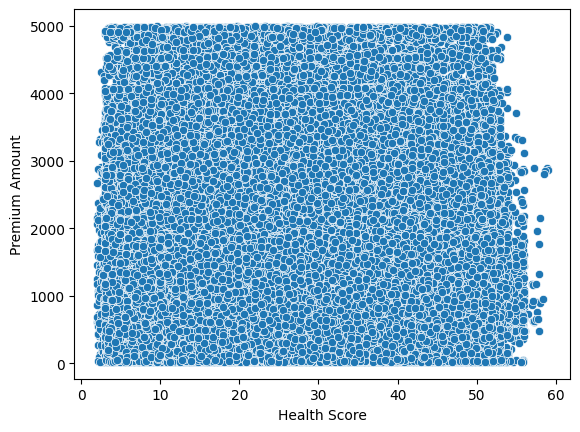

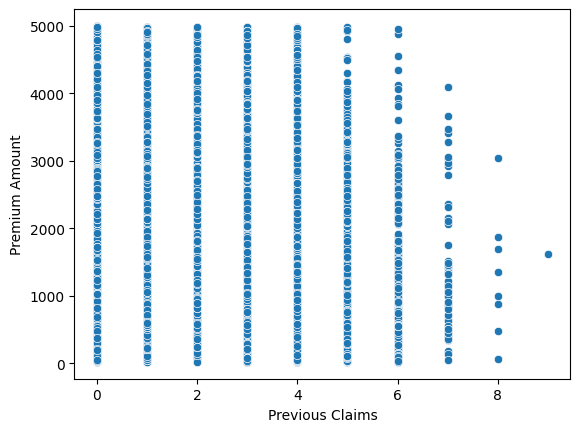

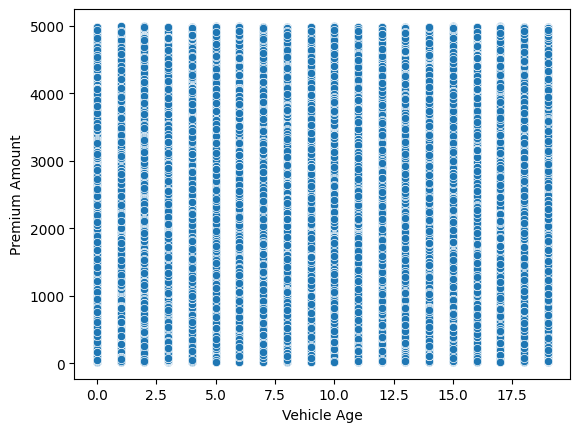

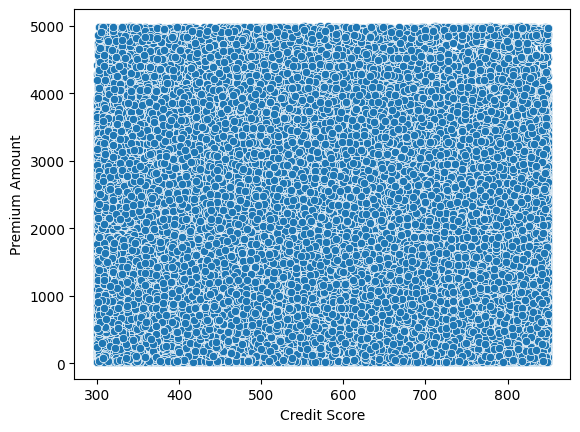

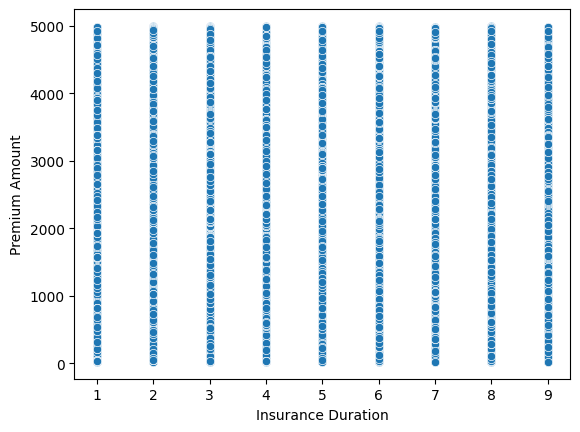

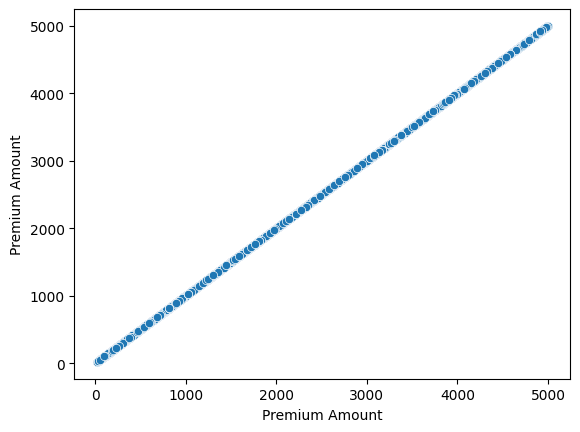

In [21]:
for n in numerical_features_total:
    sns.scatterplot(X_train, x=n, y='Premium Amount')
    plt.show()

## Sort by Premium Amount

Here I decided to sort dataset by premium amount to get insight which type of users pay the highest premium

In [22]:
sorted_data = X_train.sort_values(by='Premium Amount', ascending=False)

In [23]:
sorted_data.head(10)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
848669,19.0,Male,14900.0,Single,0,High School,NaN,23.246886,Urban,Basic,0,17,552.0,6,2022-11-11 15:21:39.170099,Good,No,Rarely,House,4999.0
767167,51.0,Male,38988.0,Divorced,2,High School,Unemployed,26.002469,Rural,Basic,0,10,778.0,2,2020-07-06 15:21:39.134960,Good,Yes,Rarely,Condo,4997.0
877994,26.0,Female,79801.0,Single,3,Master's,Unemployed,19.739327,Rural,Premium,<NA>,5,571.0,3,2021-06-30 15:21:39.155231,Average,Yes,Weekly,Apartment,4997.0
1169248,62.0,Female,8440.0,Married,3,Master's,Unemployed,21.997465,Urban,Premium,0,1,581.0,5,2020-01-04 15:21:39.092127,Good,Yes,Daily,Apartment,4996.0
75643,52.0,Female,23435.0,Single,1,Master's,Employed,13.285972,Urban,Basic,<NA>,15,340.0,8,2021-10-16 15:21:39.237118,Average,No,Daily,Apartment,4994.0
556721,48.0,Male,38517.0,Married,2,Master's,NaN,9.547851,Urban,Comprehensive,<NA>,6,712.0,8,2021-01-13 15:21:39.279729,Poor,Yes,Monthly,House,4992.0
1045482,46.0,Male,2914.0,Married,0,PhD,NaN,29.829605,Urban,Premium,<NA>,2,815.0,4,2021-10-10 15:21:39.261856,Poor,No,Monthly,Apartment,4991.0
995321,47.0,Female,28399.0,Married,4,High School,Unemployed,47.330029,Rural,Comprehensive,1,11,486.0,5,2024-08-02 15:21:39.254678,Good,No,Weekly,House,4988.0
669083,24.0,Female,53868.0,Single,1,Master's,NaN,31.255646,Urban,Premium,<NA>,1,303.0,9,2022-03-20 15:21:39.218388,Good,No,Monthly,Apartment,4988.0
378477,31.0,Male,65382.0,Married,2,Master's,NaN,31.255646,Urban,Comprehensive,<NA>,14,303.0,3,2021-12-12 15:21:39.208842,Good,No,Rarely,House,4988.0


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


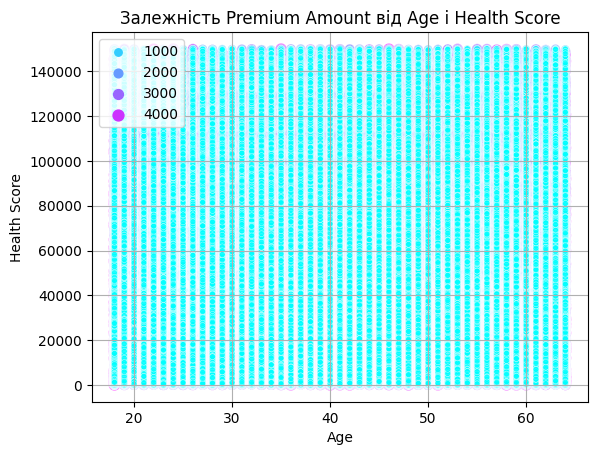

In [24]:
import seaborn as sns

# Вибір змінних
subset = sorted_data[['Age', 'Annual Income', 'Premium Amount']]

# Візуалізація залежності між віком та здоров'ям для премії
sns.scatterplot(data=subset, x='Age', y='Annual Income', size='Premium Amount', hue='Premium Amount', palette='cool', alpha=0.7)
plt.title('Залежність Premium Amount від Age і Health Score')
plt.xlabel('Age')
plt.ylabel('Health Score')
plt.legend()
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Premium Amount', ylabel='Count'>

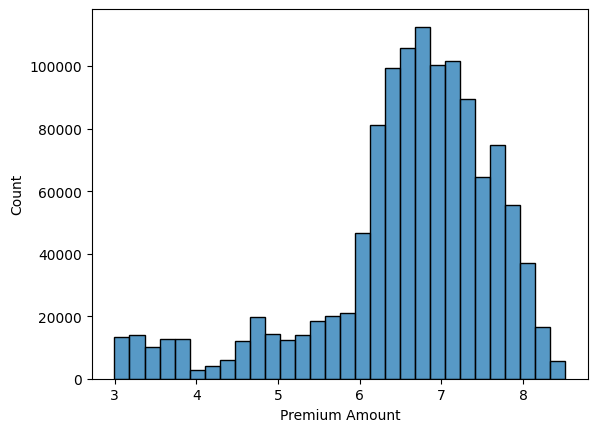

In [25]:
sns.histplot(np.log(sorted_data['Premium Amount']), bins=30)

In [26]:
box_features = sorted_data.select_dtypes(include=['object']).columns.tolist()
box_features.remove('Policy Start Date')
box_features

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type']

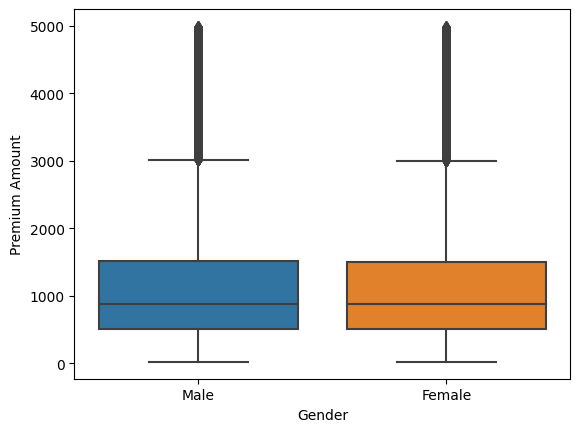

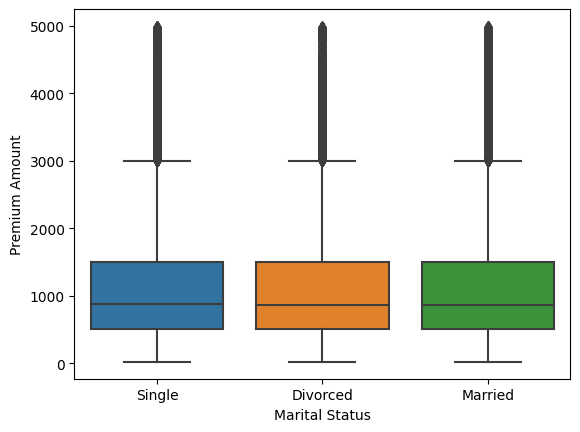

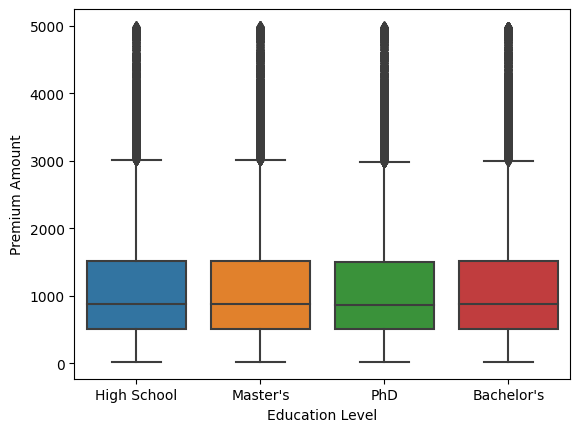

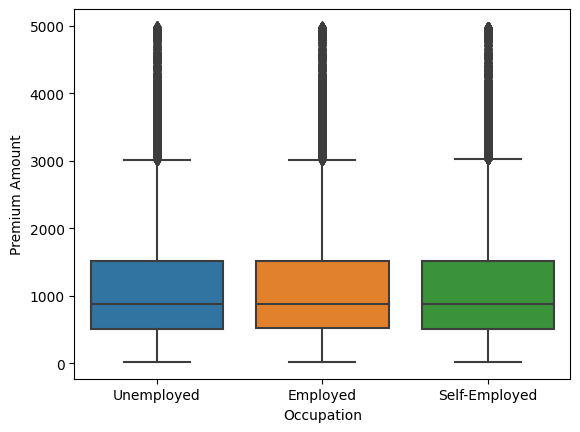

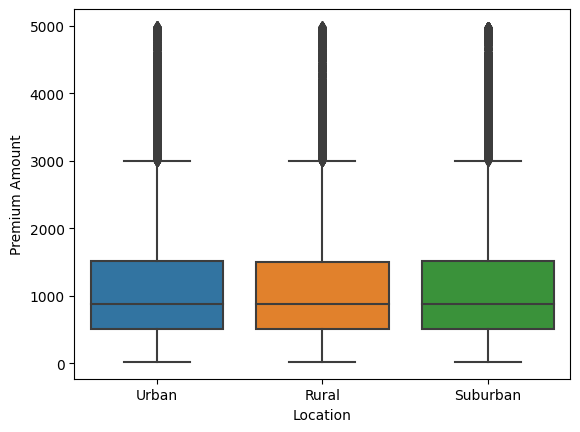

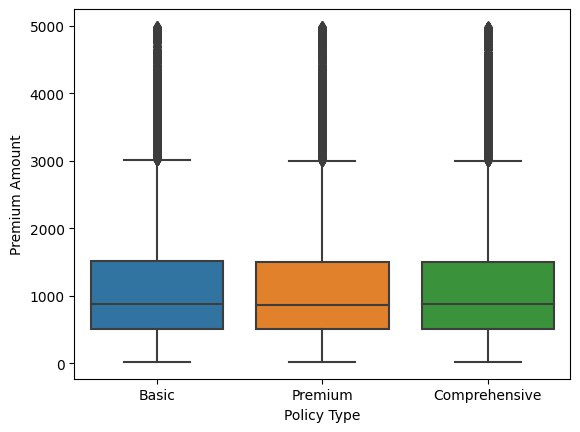

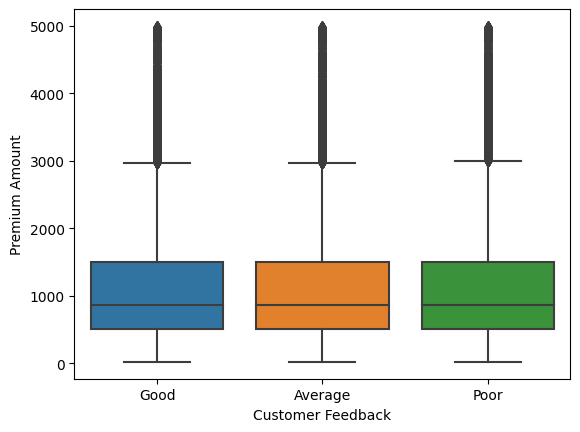

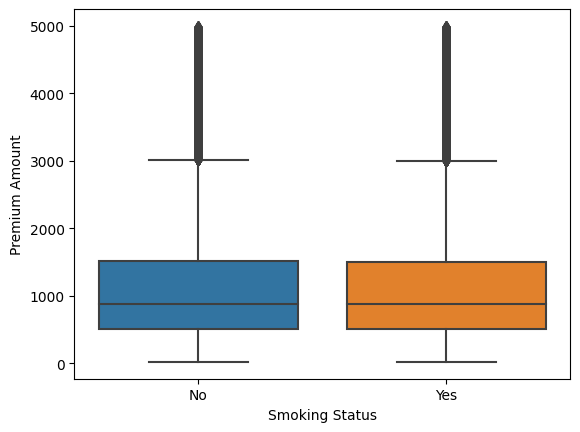

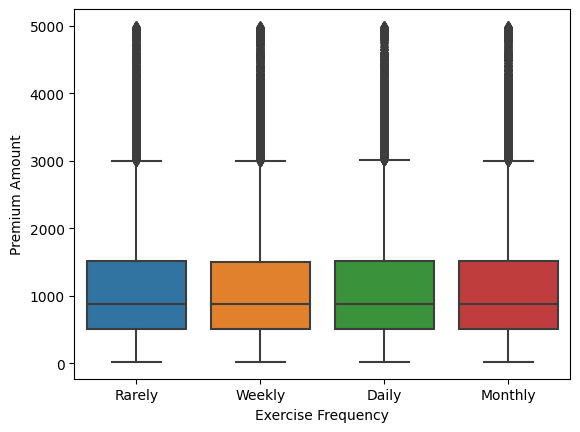

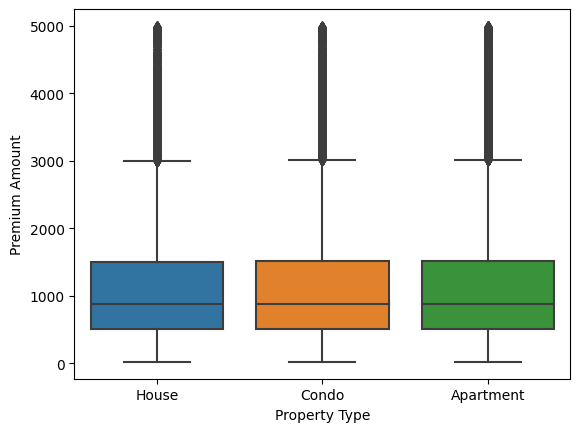

In [27]:
for b in box_features:
    sns.boxplot(data=sorted_data, x=b, y='Premium Amount')
    plt.show()

In [28]:
X_train.isna().sum()

Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64